# **QUESTION:1**

Regression analysis of the data on zameen.com

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model

In [54]:
# Load the dataset
#import csv
#property_data = pd.read_csv('/content/Q1_property.csv', encoding='utf-8', sep=';', quoting=csv.QUOTE_NONE)
property_data= pd.read_excel('/content/property.xlsx')

In [55]:
property_data.columns

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent'],
      dtype='object')

In [56]:
property_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191393 entries, 0 to 191392
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    191393 non-null  int64  
 1   location_id    191393 non-null  int64  
 2   page_url       191393 non-null  object 
 3   property_type  191393 non-null  object 
 4   price          191393 non-null  int64  
 5   location       191393 non-null  object 
 6   city           191393 non-null  object 
 7   province_name  191393 non-null  object 
 8   latitude       191393 non-null  float64
 9   longitude      191393 non-null  float64
 10  baths          191393 non-null  int64  
 11  area           191393 non-null  object 
 12  purpose        191393 non-null  object 
 13  bedrooms       191393 non-null  int64  
 14  date_added     191393 non-null  object 
 15  agency         191393 non-null  object 
 16  agent          191393 non-null  object 
dtypes: float64(2), int64(5), obje

In [57]:
#string colums are
#    'page_url', 'property_type', 'location', 'city', 'province_name',  'area', 'purpose', 'date_added', 'agency', 'agent'
#------------------------------------------------------------------------------------------------------------------------------
#integer or float columns are
#  'property_id'  'location_id'   'price' 'latitude' 'longitude'  'baths'

In [58]:
#finding those colums which have empty strings
# Check for columns containing ""
columns_with_empty_quotes = property_data.isin(['""']).any()

# Display columns with empty quotes
print(columns_with_empty_quotes[columns_with_empty_quotes])

agency    True
agent     True
dtype: bool


In [59]:
# Fill empty strings in 'agency' and 'agent' columns with the values above them
#here the method ffill makes sure to add the last observatio in the place where "" is present
property_data['agency'] = property_data['agency'].replace('""', method='ffill')
property_data['agent'] = property_data['agent'].replace('""', method='ffill')

In [60]:
#Remove entire duplicate rows
property_data.drop_duplicates(inplace=True)

In [61]:
property_data.shape

(191393, 17)

In [62]:
# Check DataFrame shape before removing duplicates
print("Before:", property_data.shape)
# Remove duplicates based on 'property_id'
property_data.drop_duplicates(subset='property_id', inplace=True)
# Check DataFrame shape after removing duplicates
print("After:", property_data.shape)

Before: (191393, 17)
After: (191393, 17)


In [531]:
#-----------------------------------------------------------------------------------------------------------------
#data set of PUNJAB
# Filter the data for the specific province 'Punjab'
punjab_data = property_data[property_data['province_name'] == '"Punjab"'].copy()

In [532]:
punjab_data.shape

(90714, 17)

In [533]:
# Save DataFrame to an Excel file
#punjab_data.to_excel('punjab_data.xlsx', index=False)

In [534]:
# Convert 'date_column' to datetime format with explicit date format
punjab_data['date_added'] = pd.to_datetime(punjab_data['date_added'], format='"%m-%d-%Y"')  # Replace with the actual date format
# Convert datetime format to 'DD-MM-YYYY' string format
punjab_data['date_added'] =punjab_data['date_added'].dt.strftime('%d-%m-%Y')


# **EDA**

PART#1 What is the overall correlation structure within the dataset? Are there any notable high or
low correlations between variables?

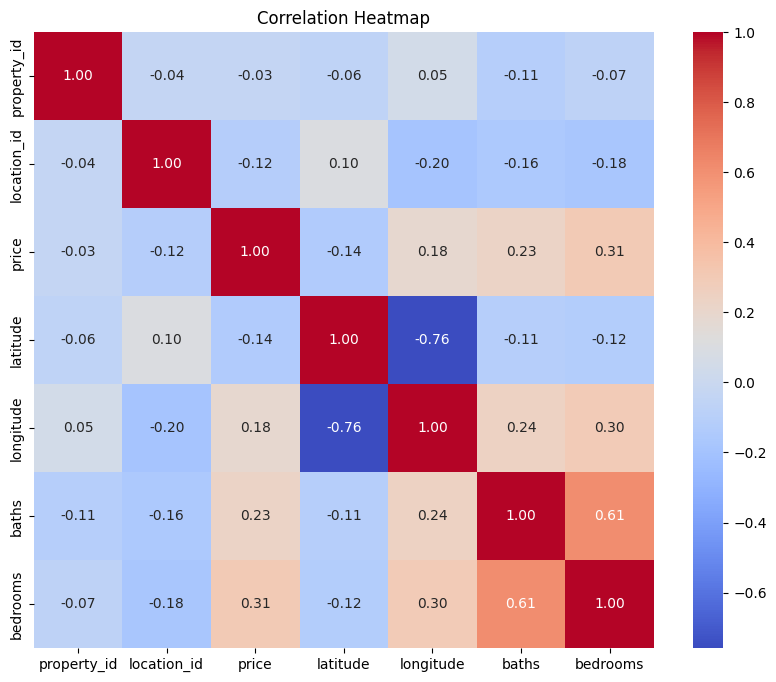

In [535]:
import seaborn as sns
#Select numeric columns for correlation analysis
numeric_columns = punjab_data.select_dtypes(include='number')

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

the relationships which we can interpret from the above heatmap are that
*   when no of bedrooms increase than no of baths increase.
*   when bedrooms increase than price increases.
*   when baths increase than price increases.
*   when bedrooms and baths increase than longitude increase.



PART#2 Is there a correlation between the number of properties listed by an agent or agency and
the average property price?

In [536]:
#group the data frame and store the no of properties listed by every agent
properties_count = punjab_data.groupby('agent')['property_id'].count()

In [537]:
#calculate the mean price of the properties listed by every agent
average_price = punjab_data.groupby('agent')['price'].mean()

In [538]:
# Create a DataFrame from the series
data = pd.DataFrame({'PropertiesCount': properties_count, 'AveragePrice': average_price})

In [539]:
# Calculate the correlation between properties count and average price
correlation = data['PropertiesCount'].corr(data['AveragePrice'])
print(f"Correlation between number of properties listed and average property price: {correlation}")

Correlation between number of properties listed and average property price: -0.023471963793580936


the relation between no of properties and average price of the property comes out to be negatice cuz t doesnot matters how many property a perticular agent lists. There are going to be some properties in areas which are costly than the other areas which are less expensive.

# **Feature Engineering**

PART#1 Compute a new column indicating the price per square meter, considering that the area
column is in square meters.

In [540]:
# Assuming 'punjab_data' is your DataFrame

# Define conversion factors
kanal_to_sqm = 505.857
marla_to_sqm = 25.2929

# Extract numeric values from 'area' column and convert to square meters
punjab_data['area_in_sqm'] = punjab_data['area'].str.extract('(\d+\.?\d*)').astype(float)
punjab_data.loc[punjab_data['area'].str.contains('Kanal'), 'area_in_sqm'] *= kanal_to_sqm
punjab_data.loc[punjab_data['area'].str.contains('Marla'), 'area_in_sqm'] *= marla_to_sqm

# Compute price per square meter
punjab_data['price_per_sqm'] = punjab_data['price'] / punjab_data['area_in_sqm']

In [541]:
punjab_data.head(10)

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,area_in_sqm,price_per_sqm
0,347795,8,"""https://www.zameen.com/Property/lahore_model_...","""House""",220000000,"""Model Town""","""Lahore""","""Punjab""",31.483869,74.325686,0,"""6 Kanal""","""For Sale""",0,17-07-2019,"""Real Biz International""","""Usama Khan""",3035.1420,72484.252796
1,482892,48,"""https://www.zameen.com/Property/lahore_multan...","""House""",40000000,"""Multan Road""","""Lahore""","""Punjab""",31.431593,74.179980,5,"""1 Kanal""","""For Sale""",5,06-10-2018,"""Khan Estate""","""mohsinkhan and B""",505.8570,79073.730323
2,555962,75,"""https://www.zameen.com/Property/eden_eden_ave...","""House""",9500000,"""Eden""","""Lahore""","""Punjab""",31.499348,74.416959,0,"""9 Marla""","""For Sale""",3,03-07-2019,"""Shahum Estate 2""","""Babar Hameed, Raja Omar""",227.6361,41733.275170
3,562843,3821,"""https://www.zameen.com/Property/gulberg_2_gul...","""House""",125000000,"""Gulberg""","""Lahore""","""Punjab""",31.522069,74.355512,7,"""1 Kanal""","""For Sale""",8,04-04-2019,"""Shahum Estate 2""","""Babar Hameed, Raja Omar""",505.8570,247105.407259
4,686990,3522,"""https://www.zameen.com/Property/allama_iqbal_...","""House""",21000000,"""Allama Iqbal Town""","""Lahore""","""Punjab""",31.506483,74.286017,5,"""11 Marla""","""For Sale""",6,04-04-2019,"""Shahum Estate 2""","""Babar Hameed, Raja Omar""",278.2219,75479.320643
5,785289,3102,"""https://www.zameen.com/Property/gulberg_paf_f...","""House""",52000000,"""Gulberg""","""Lahore""","""Punjab""",31.495909,74.350569,6,"""1 Kanal""","""For Sale""",5,02-06-2019,"""MATZ Services""","""Group Captain (R) Tajammul Baig""",505.8570,102795.849420
6,891543,4031,"""https://www.zameen.com/Property/military_acco...","""House""",16500000,"""Military Accounts Housing Society""","""Lahore""","""Punjab""",31.421229,74.285560,7,"""8 Marla""","""For Sale""",6,03-07-2019,"""MATZ Services""","""Group Captain (R) Tajammul Baig""",202.3432,81544.623195
7,983065,3749,"""https://www.zameen.com/Property/eme_society_e...","""House""",32500000,"""EME Society""","""Lahore""","""Punjab""",31.439978,74.209685,0,"""1 Kanal""","""For Sale""",5,03-07-2019,"""Sukhera Estate & Builders""","""Ahmed Sheraz Sukhera""",505.8570,64247.405887
8,983066,3745,"""https://www.zameen.com/Property/eme_society_e...","""House""",31500000,"""EME Society""","""Lahore""","""Punjab""",31.437744,74.213490,0,"""1 Kanal""","""For Sale""",6,03-07-2019,"""Sukhera Estate & Builders""","""Ahmed Sheraz Sukhera""",505.8570,62270.562629
9,983075,3931,"""https://www.zameen.com/Property/izmir_town_iz...","""House""",40000000,"""Izmir Town""","""Lahore""","""Punjab""",31.409106,74.181662,0,"""1.6 Kanal""","""For Sale""",6,03-07-2019,"""Sukhera Estate & Builders""","""Ahmed Sheraz Sukhera""",809.3712,49421.081452


PART#2 Derive additional temporal features, such as month, quarter, or day of the week, from the
date_added column.

In [542]:
# Convert 'date_added' column to datetime format with a specific date format
punjab_data['date_added'] = pd.to_datetime(punjab_data['date_added'], format='%d-%m-%Y')

# Extract month, quarter, and day of the week into new columns
punjab_data['month_added'] = punjab_data['date_added'].dt.month
punjab_data['quarter_added'] = punjab_data['date_added'].dt.quarter
punjab_data['day_of_week_added'] = punjab_data['date_added'].dt.dayofweek  # Monday=0, Sunday=6
#January, February, March (First Quarter)
#April, May, June (Second Quarter)
#July, August, September (Third Quarter)
#October, November, December (Fourth Quarter)

In [543]:
punjab_data.head(10)

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,...,purpose,bedrooms,date_added,agency,agent,area_in_sqm,price_per_sqm,month_added,quarter_added,day_of_week_added
0,347795,8,"""https://www.zameen.com/Property/lahore_model_...","""House""",220000000,"""Model Town""","""Lahore""","""Punjab""",31.483869,74.325686,...,"""For Sale""",0,2019-07-17,"""Real Biz International""","""Usama Khan""",3035.1420,72484.252796,7,3,2
1,482892,48,"""https://www.zameen.com/Property/lahore_multan...","""House""",40000000,"""Multan Road""","""Lahore""","""Punjab""",31.431593,74.179980,...,"""For Sale""",5,2018-10-06,"""Khan Estate""","""mohsinkhan and B""",505.8570,79073.730323,10,4,5
2,555962,75,"""https://www.zameen.com/Property/eden_eden_ave...","""House""",9500000,"""Eden""","""Lahore""","""Punjab""",31.499348,74.416959,...,"""For Sale""",3,2019-07-03,"""Shahum Estate 2""","""Babar Hameed, Raja Omar""",227.6361,41733.275170,7,3,2
3,562843,3821,"""https://www.zameen.com/Property/gulberg_2_gul...","""House""",125000000,"""Gulberg""","""Lahore""","""Punjab""",31.522069,74.355512,...,"""For Sale""",8,2019-04-04,"""Shahum Estate 2""","""Babar Hameed, Raja Omar""",505.8570,247105.407259,4,2,3
4,686990,3522,"""https://www.zameen.com/Property/allama_iqbal_...","""House""",21000000,"""Allama Iqbal Town""","""Lahore""","""Punjab""",31.506483,74.286017,...,"""For Sale""",6,2019-04-04,"""Shahum Estate 2""","""Babar Hameed, Raja Omar""",278.2219,75479.320643,4,2,3
5,785289,3102,"""https://www.zameen.com/Property/gulberg_paf_f...","""House""",52000000,"""Gulberg""","""Lahore""","""Punjab""",31.495909,74.350569,...,"""For Sale""",5,2019-06-02,"""MATZ Services""","""Group Captain (R) Tajammul Baig""",505.8570,102795.849420,6,2,6
6,891543,4031,"""https://www.zameen.com/Property/military_acco...","""House""",16500000,"""Military Accounts Housing Society""","""Lahore""","""Punjab""",31.421229,74.285560,...,"""For Sale""",6,2019-07-03,"""MATZ Services""","""Group Captain (R) Tajammul Baig""",202.3432,81544.623195,7,3,2
7,983065,3749,"""https://www.zameen.com/Property/eme_society_e...","""House""",32500000,"""EME Society""","""Lahore""","""Punjab""",31.439978,74.209685,...,"""For Sale""",5,2019-07-03,"""Sukhera Estate & Builders""","""Ahmed Sheraz Sukhera""",505.8570,64247.405887,7,3,2
8,983066,3745,"""https://www.zameen.com/Property/eme_society_e...","""House""",31500000,"""EME Society""","""Lahore""","""Punjab""",31.437744,74.213490,...,"""For Sale""",6,2019-07-03,"""Sukhera Estate & Builders""","""Ahmed Sheraz Sukhera""",505.8570,62270.562629,7,3,2
9,983075,3931,"""https://www.zameen.com/Property/izmir_town_iz...","""House""",40000000,"""Izmir Town""","""Lahore""","""Punjab""",31.409106,74.181662,...,"""For Sale""",6,2019-07-03,"""Sukhera Estate & Builders""","""Ahmed Sheraz Sukhera""",809.3712,49421.081452,7,3,2


PART#3 Standardise the numerical variables using a suitable standardisation technique.

In [544]:
from sklearn.preprocessing import StandardScaler
# Numerical columns for standardization
numerical_cols = ['price', 'latitude', 'longitude','baths','bedrooms','month_added','quarter_added','day_of_week_added']  # Update with your numerical columns
# Initialize StandardScaler
scaler = StandardScaler()
# Apply standardization to the numerical columns
punjab_data[numerical_cols] = scaler.fit_transform(punjab_data[numerical_cols])


In [545]:
print(punjab_data.columns)

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'area_in_sqm', 'price_per_sqm', 'month_added', 'quarter_added',
       'day_of_week_added'],
      dtype='object')


In [546]:
punjab_data.head(10)

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,...,purpose,bedrooms,date_added,agency,agent,area_in_sqm,price_per_sqm,month_added,quarter_added,day_of_week_added
0,347795,8,"""https://www.zameen.com/Property/lahore_model_...","""House""",6.860430,"""Model Town""","""Lahore""","""Punjab""",-0.547093,0.703241,...,"""For Sale""",-1.680085,2019-07-17,"""Real Biz International""","""Usama Khan""",3035.1420,72484.252796,0.441809,0.716256,-0.279914
1,482892,48,"""https://www.zameen.com/Property/lahore_multan...","""House""",0.821946,"""Multan Road""","""Lahore""","""Punjab""",-0.603442,0.469120,...,"""For Sale""",0.905622,2018-10-06,"""Khan Estate""","""mohsinkhan and B""",505.8570,79073.730323,2.135043,2.133428,1.365756
2,555962,75,"""https://www.zameen.com/Property/eden_eden_ave...","""House""",-0.201241,"""Eden""","""Lahore""","""Punjab""",-0.530407,0.849900,...,"""For Sale""",-0.128661,2019-07-03,"""Shahum Estate 2""","""Babar Hameed, Raja Omar""",227.6361,41733.275170,0.441809,0.716256,-0.279914
3,562843,3821,"""https://www.zameen.com/Property/gulberg_2_gul...","""House""",3.673453,"""Gulberg""","""Lahore""","""Punjab""",-0.505916,0.751166,...,"""For Sale""",2.457046,2019-04-04,"""Shahum Estate 2""","""Babar Hameed, Raja Omar""",505.8570,247105.407259,-1.251425,-0.700915,0.268643
4,686990,3522,"""https://www.zameen.com/Property/allama_iqbal_...","""House""",0.184551,"""Allama Iqbal Town""","""Lahore""","""Punjab""",-0.522716,0.639501,...,"""For Sale""",1.422763,2019-04-04,"""Shahum Estate 2""","""Babar Hameed, Raja Omar""",278.2219,75479.320643,-1.251425,-0.700915,0.268643
5,785289,3102,"""https://www.zameen.com/Property/gulberg_paf_f...","""House""",1.224512,"""Gulberg""","""Lahore""","""Punjab""",-0.534114,0.743224,...,"""For Sale""",0.905622,2019-06-02,"""MATZ Services""","""Group Captain (R) Tajammul Baig""",505.8570,102795.849420,-0.122602,-0.700915,1.914313
6,891543,4031,"""https://www.zameen.com/Property/military_acco...","""House""",0.033589,"""Military Accounts Housing Society""","""Lahore""","""Punjab""",-0.614613,0.638767,...,"""For Sale""",1.422763,2019-07-03,"""MATZ Services""","""Group Captain (R) Tajammul Baig""",202.3432,81544.623195,0.441809,0.716256,-0.279914
7,983065,3749,"""https://www.zameen.com/Property/eme_society_e...","""House""",0.570343,"""EME Society""","""Lahore""","""Punjab""",-0.594403,0.516850,...,"""For Sale""",0.905622,2019-07-03,"""Sukhera Estate & Builders""","""Ahmed Sheraz Sukhera""",505.8570,64247.405887,0.441809,0.716256,-0.279914
8,983066,3745,"""https://www.zameen.com/Property/eme_society_e...","""House""",0.536796,"""EME Society""","""Lahore""","""Punjab""",-0.596812,0.522964,...,"""For Sale""",1.422763,2019-07-03,"""Sukhera Estate & Builders""","""Ahmed Sheraz Sukhera""",505.8570,62270.562629,0.441809,0.716256,-0.279914
9,983075,3931,"""https://www.zameen.com/Property/izmir_town_iz...","""House""",0.821946,"""Izmir Town""","""Lahore""","""Punjab""",-0.627681,0.471823,...,"""For Sale""",1.422763,2019-07-03,"""Sukhera Estate & Builders""","""Ahmed Sheraz Sukhera""",809.3712,49421.081452,0.441809,0.716256,-0.279914


PART#4 Encode the categorical variables using an appropriate encoding method.

In [547]:
# Categorical columns for one-hot encoding
categorical_cols = ['property_type', 'city','purpose','location','property_type']  # Update with your categorical columns
# Perform one-hot encoding on the selected columns
punjab_data = pd.get_dummies(punjab_data, columns=categorical_cols, drop_first=True)
punjab_data.reset_index()

,index,property_id,location_id,page_url,price,province_name,latitude,longitude,baths,area,...,"location_""Zia Colony""","location_""Zubaida Park""","location_""Zubair Colony""","location_""Zulfiqar Colony""","property_type_""Flat""","property_type_""House""","property_type_""Lower Portion""","property_type_""Penthouse""","property_type_""Room""","property_type_""Upper Portion"""
0,0,347795,8,"""https://www.zameen.com/Property/lahore_model_...",6.860430,"""Punjab""",-0.547093,0.703241,-1.103334,"""6 Kanal""",...,0,0,0,0,0,1,0,0,0,0
1,1,482892,48,"""https://www.zameen.com/Property/lahore_multan...",0.821946,"""Punjab""",-0.603442,0.469120,0.748197,"""1 Kanal""",...,0,0,0,0,0,1,0,0,0,0
2,2,555962,75,"""https://www.zameen.com/Property/eden_eden_ave...",-0.201241,"""Punjab""",-0.530407,0.849900,-1.103334,"""9 Marla""",...,0,0,0,0,0,1,0,0,0,0
3,3,562843,3821,"""https://www.zameen.com/Property/gulberg_2_gul...",3.673453,"""Punjab""",-0.505916,0.751166,1.488810,"""1 Kanal""",...,0,0,0,0,0,1,0,0,0,0
4,4,686990,3522,"""https://www.zameen.com/Property/allama_iqbal_...",0.184551,"""Punjab""",-0.522716,0.639501,0.748197,"""11 Marla""",...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90709,191248,17468968,1587,"""https://www.zameen.com/Property/dha_phase_3_d...",-0.515746,"""Punjab""",-0.561019,0.782541,-1.103334,"""2 Kanal""",...,0,0,0,0,0,0,0,0,0,1
90710,191249,17468985,1602,"""https://www.zameen.com/Property/dha_phase_5_d...",-0.513733,"""Punjab""",-0.571831,0.840052,1.118503,"""1 Kanal""",...,0,0,0,0,0,1,0,0,0,0
90711,191250,17469039,1607,"""https://www.zameen.com/Property/dha_phase_5_d...",-0.514907,"""Punjab""",-0.568871,0.823640,0.748197,"""10 Marla""",...,0,0,0,0,0,1,0,0,0,0
90712,191251,17469096,1591,"""https://www.zameen.com/Property/dha_phase_4_d...",-0.517591,"""Punjab""",-0.568516,0.789781,0.007585,"""1 Kanal""",...,0,0,0,0,0,0,0,0,0,1


In [548]:
print(punjab_data.columns)

Index(['property_id', 'location_id', 'page_url', 'price', 'province_name',
       'latitude', 'longitude', 'baths', 'area', 'bedrooms',
       ...
       'location_"Zia Colony"', 'location_"Zubaida Park"',
       'location_"Zubair Colony"', 'location_"Zulfiqar Colony"',
       'property_type_"Flat"', 'property_type_"House"',
       'property_type_"Lower Portion"', 'property_type_"Penthouse"',
       'property_type_"Room"', 'property_type_"Upper Portion"'],
      dtype='object', length=1180)


In [549]:
#punjab_data = punjab_data.drop(columns=['page_url'])
#punjab_data = punjab_data.drop(columns=['area'])
#punjab_data = punjab_data.drop(columns=['province_name'])
#punjab_data = punjab_data.drop(columns=['purpose_"For Sale"'])
# Assuming 'punjab_data' is your DataFrame
columns_to_drop = ['page_url','province_name','property_id', 'location_id','area','date_added','agency','agent','area_in_sqm','price_per_sqm']
punjab_data=punjab_data.drop(columns=columns_to_drop) #inplace=True


# MODEL

In [550]:
from sklearn.model_selection import train_test_split

# Assuming 'X' contains features and 'y' contains the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [551]:
from sklearn.linear_model import LinearRegression
# Initialize the Linear Regression model
model = LinearRegression()

In [552]:
model.fit(X_train, y_train)

LinearRegression()

In [553]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Define the hyperparameters and values to search (excluding 'normalize')
param_grid = {'fit_intercept': [True, False]}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

In [554]:
from sklearn.metrics import r2_score, mean_squared_error
# Predict on the test set
y_pred = model.predict(X_test)
# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [555]:
print(mse)

0.16759437340006755


In [556]:
print(r2)

-0.026281931234584777


# Evaluation

In [557]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Assuming 'y_test' contains the actual target values and 'y_pred' contains the predicted values
mae = mean_absolute_error(y_test, y_pred)   # Calculate Mean Absolute Error (MAE)
mse = mean_squared_error(y_test, y_pred)    # Calculate Mean Squared Error (MSE)
rmse = np.sqrt(mse)                         # Calculate Root Mean Squared Error (RMSE)

# Calculate Mean Absolute Percentage Error (MAPE)
# MAPE might need handling for cases with zero values in 'y_test'
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Percentage Error:", mape)

Mean Absolute Error: 0.32916120672458893
Mean Squared Error: 0.16759437340006755
Root Mean Squared Error: 0.4093829178166421
Mean Absolute Percentage Error: 741573666078861.0


In [558]:
punjab_data.shape

(90714, 1170)

In [559]:
#--------------------------------------------------------------------------------------------
#--------------------BONUS-------------------------------------------------------------------
from sklearn.decomposition import PCA

# Assuming X contains your features
pca = PCA(n_components=6)  # Choose the number of components
X_pca = pca.fit_transform(punjab_data)

In [560]:
punjab_data.shape

(90714, 1170)

#**QUESTION:2**

# Data Preprocessing

In [561]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [562]:
# Load the dataset
data = pd.read_csv('/content/Q2_Fraud_check.csv')

In [563]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [564]:
# Convert categorical variables to dummy variables
data = pd.get_dummies(data, columns=['Undergrad', 'Marital.Status', 'Urban'], drop_first=True)

In [565]:
data.head(5)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0


In [566]:
# Define target variable
data['Target'] = data['Taxable.Income'].apply(lambda x: 1 if x > 30000 else 0)

In [567]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Scale 'Work Experience' feature
data['Work.Experience'] = scaler.fit_transform(data[['Work.Experience']])

# Data Split and Model Training

In [568]:
# Define features (X) and target variable (y)
X = data.drop(['Taxable.Income', 'Target'], axis=1)  # Features excluding 'Taxable Income' and 'Target'
y = data['Target']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random state 42

In [569]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier()         # Initialize the Decision Tree Classifier
clf.fit(X_train, y_train)              # Train the model using the training data

DecisionTreeClassifier()

In [570]:
predictions=clf.predict(X_test)
predictions

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [571]:
clf.predict_proba(X_test)

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

# Model Evaluation

In [572]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)  #importing the accuracy score matrix to check accuracy

0.675

In [573]:
from sklearn.metrics import confusion_matrix                      #   TP      FP
confusion_matrix(y_test,predictions,labels=[0,1])                 #   FN      TN
#cechking confusion matrix to check no of true positives, false positive etc

array([[ 4, 22],
       [17, 77]])

In [574]:
from sklearn.metrics import precision_score  #here importing precision score to check the precision
precision_score(y_test,predictions)

0.7777777777777778

In [575]:
from sklearn.metrics import recall_score     #here importing recall_score to check recall
recall_score(y_test,predictions)

0.8191489361702128

In [576]:
y_pred = clf.predict(X_test) # Make predictions on the test set

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.19      0.15      0.17        26
           1       0.78      0.82      0.80        94

    accuracy                           0.68       120
   macro avg       0.48      0.49      0.48       120
weighted avg       0.65      0.68      0.66       120



# Model Improvement

In [577]:
from sklearn.ensemble import RandomForestClassifier

In [578]:
randomforest_model=RandomForestClassifier(random_state=42)

In [579]:
randomforest_model.fit(X_train,y_train)
y_pred= randomforest_model.predict(X_test)
report_randomforest = classification_report(y_test, y_pred)
print(report_randomforest)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.77      0.91      0.83        94

    accuracy                           0.72       120
   macro avg       0.38      0.46      0.42       120
weighted avg       0.60      0.72      0.65       120

